<a href="https://colab.research.google.com/github/nureeee/Visualization/blob/main/2106023_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/house-price-clean.csv')

In [3]:
df

,지역명,규모구분,연도,월,분양가격
0,서울,전체,2015,10,5841
1,서울,60㎡이하,2015,10,5652
2,서울,60㎡초과 85㎡이하,2015,10,5882
3,서울,85㎡초과 102㎡이하,2015,10,5721
4,서울,102㎡초과,2015,10,5879
...,...,...,...,...,...
4500,제주,전체,2020,2,3955
4501,제주,60㎡이하,2020,2,4039
4502,제주,60㎡초과 85㎡이하,2020,2,3962
4503,제주,85㎡초과 102㎡이하,2020,2,0


규모인 부분이 전체인 데이터 삭제

In [4]:
## 삭제할 인덱스 얻어내기
drop_idx = df.loc[df['규모구분'] == '전체', '규모구분'].index

## drop
df = df.drop(drop_idx)
df.head()

,지역명,규모구분,연도,월,분양가격
1,서울,60㎡이하,2015,10,5652
2,서울,60㎡초과 85㎡이하,2015,10,5882
3,서울,85㎡초과 102㎡이하,2015,10,5721
4,서울,102㎡초과,2015,10,5879
6,인천,60㎡이하,2015,10,3488


In [5]:
df = df.reset_index(drop=True)
df.head()

,지역명,규모구분,연도,월,분양가격
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
4,인천,60㎡이하,2015,10,3488


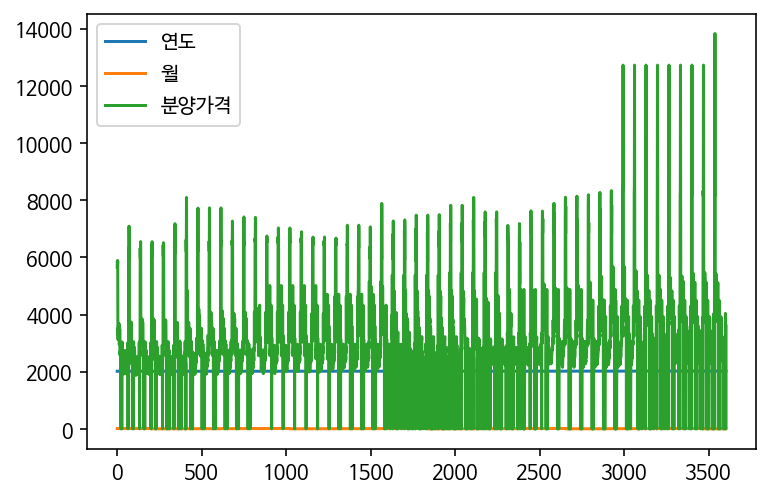

In [6]:
df.plot() ## 플롯함수를 활용하여 그래프를 그림
## 

**선택사항**

그래프의 크기를 고정하기

In [7]:
# 그래프 크기를 키워서 따로 설정하지 않는 한 고정될 수 있도록
plt.rcParams['figure.figsize'] = (12, 9)  ## 12대 9 비율

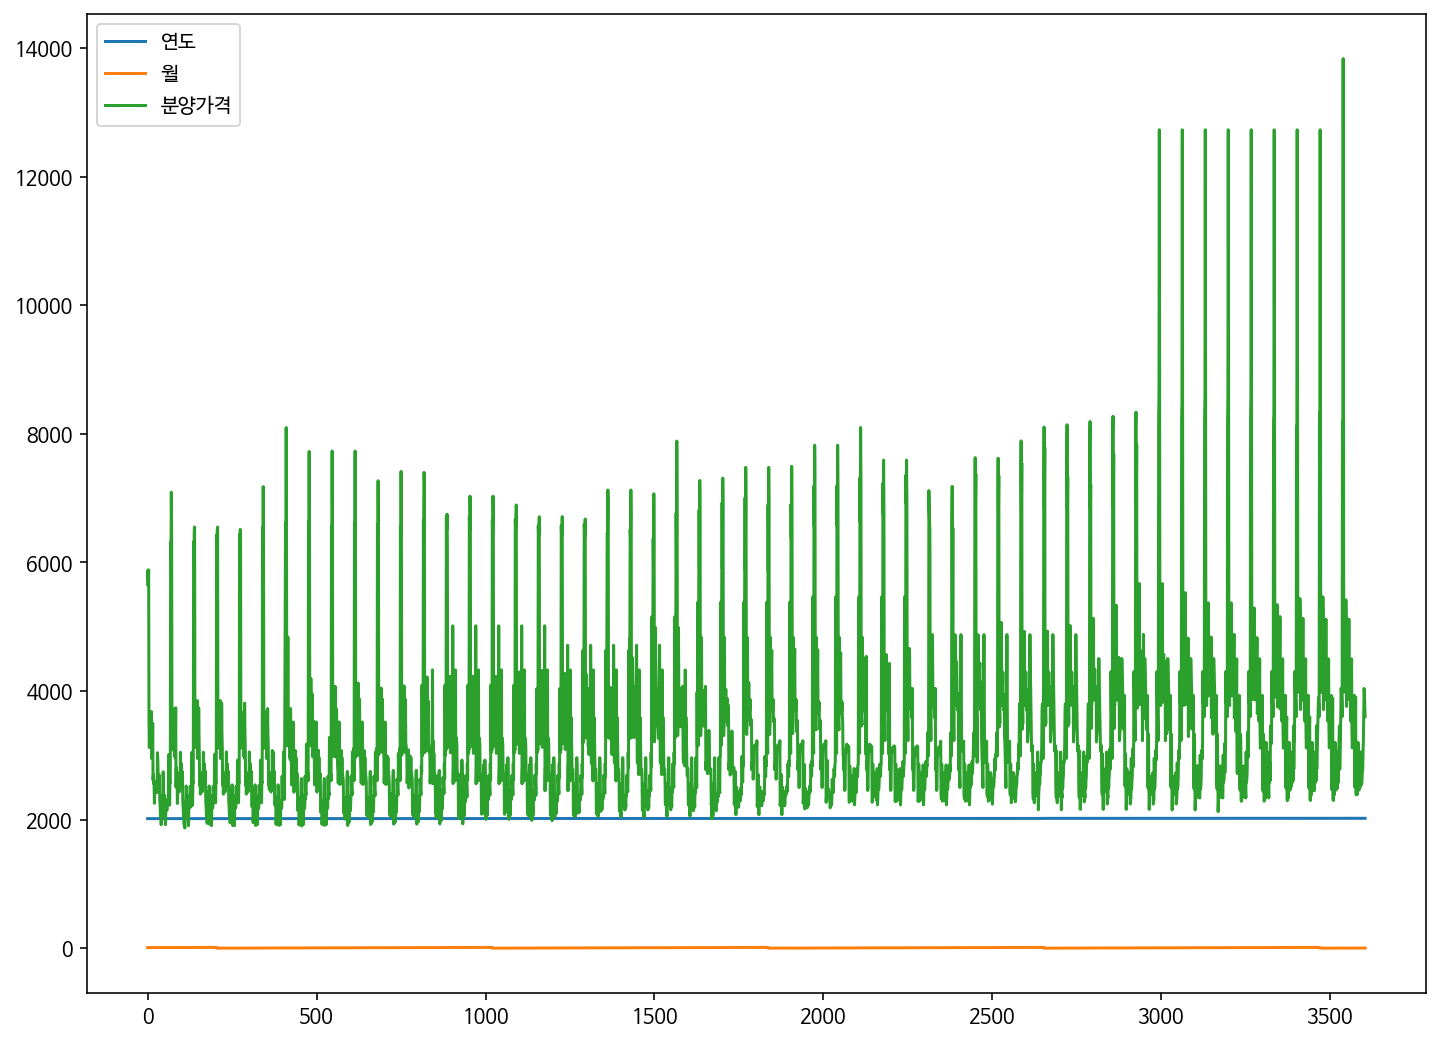

In [28]:
df.plot()

## 1.line 그래프 
- 데이터가 연속적인 특징을 띄고 있을 때 사용하기 좋다.
- 유전자 데이터 : 순서가 바뀌면 아예 의미를 잃어버리는 데이터( eg 텍스트)
- 시간에 흐름에 따라서 수집된 데이터(eg주식데이터)
- 일정시간 동안 집계된 데이터( eg일정기간 강우량)

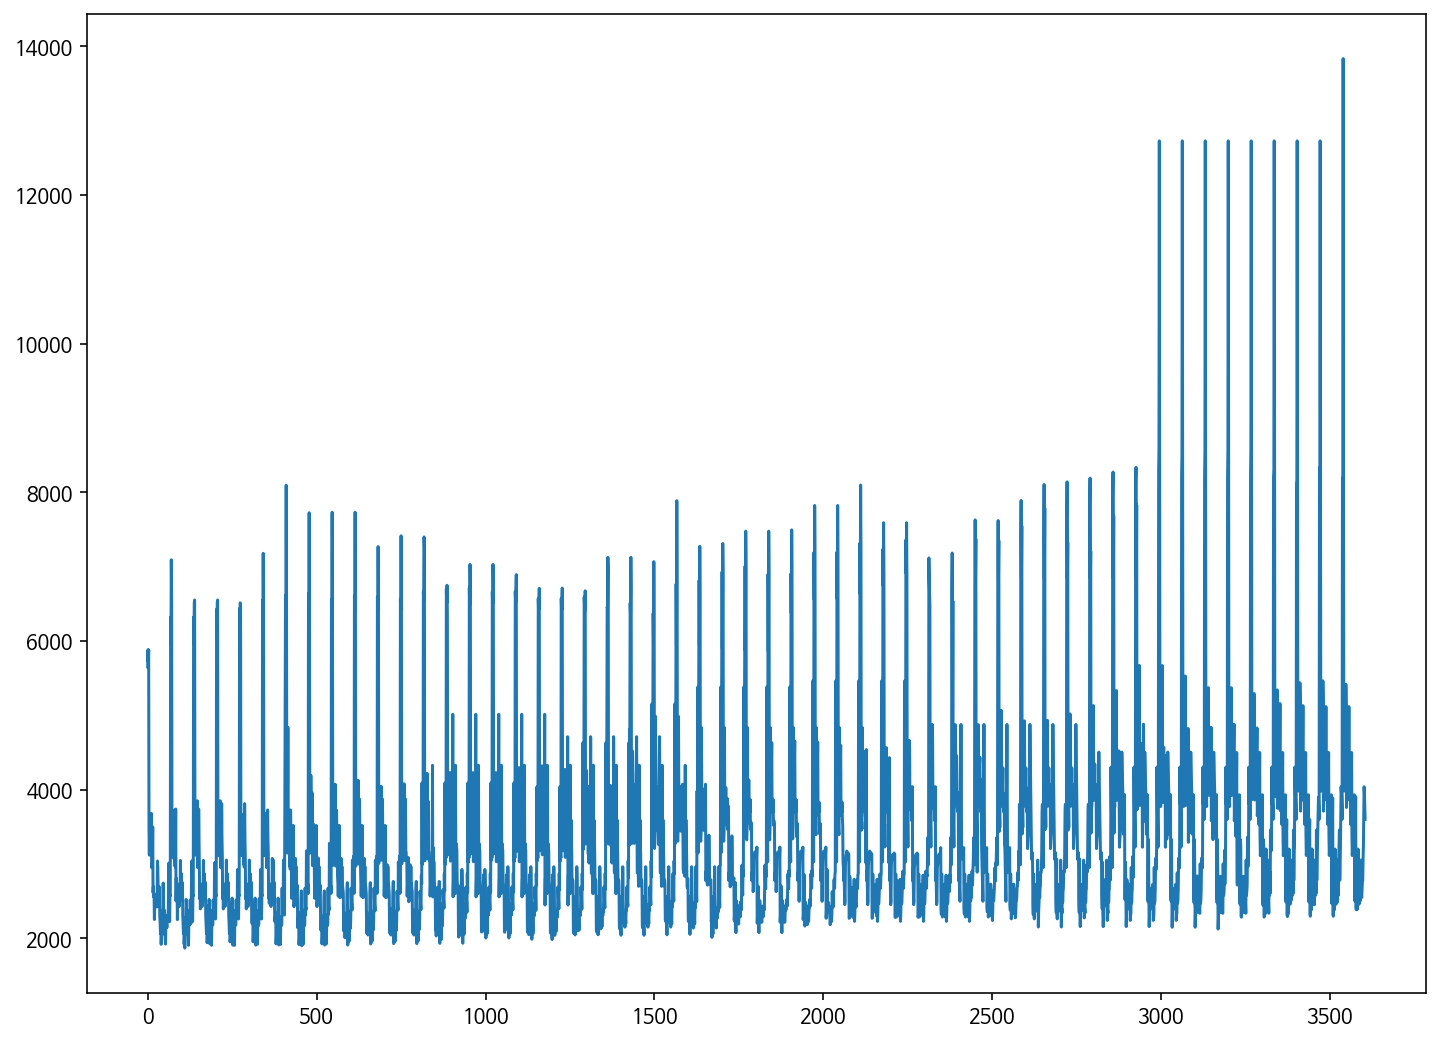

In [27]:
# x축을 따로 지정하지 않으면 데이터 프레임의 인덱스가 x축이 된다

df['분양가격'].plot(kind='line')

In [26]:
# 서울 지역의 데이터 뽑기
df_seoul = df.loc[df['지역명'] == '서울']
df_seoul.head()

,지역명,규모구분,연도,월,분양가격
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
68,서울,60㎡이하,2015,11,6320


In [25]:
# 연도별 분양가 평균 구하기
df_seoul_year = df_seoul.groupby('연도')['분양가격'].mean()
df_seoul_year

연도
2015    6201.000000
2016    6674.520833
2017    6658.729167
2018    7054.687500
2019    8735.083333
2020    9647.375000
Name: 분양가격, dtype: float64

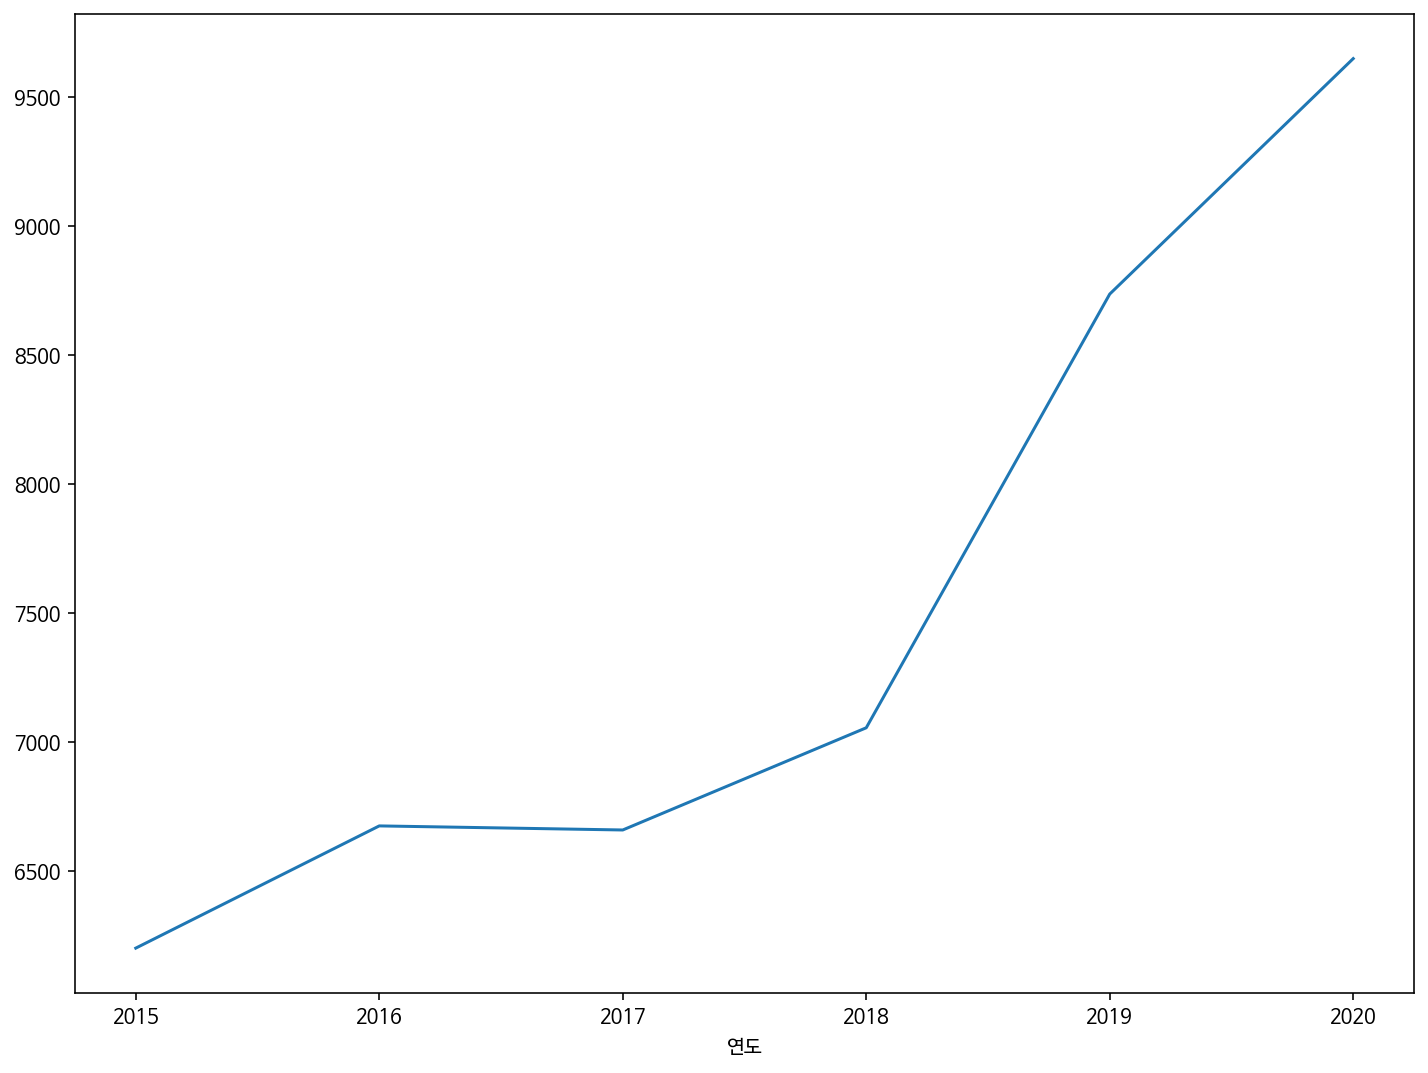

In [24]:
df_seoul_year.plot(kind='line')

# bar 그래프
bar 그래프는 그룹별(카테고리별)로 비교할 때 유용


In [13]:
#지역별 분양가 평균
local_price_mean = df.groupby('지역명')['분양가격'].mean()
local_price_mean

지역명
강원    2355.773585
경기    4133.952830
경남    2791.504717
경북    2424.966981
광주    2305.693396
대구    3523.410377
대전    2352.132075
부산    3691.981132
서울    7308.943396
세종    2772.443396
울산    1622.136792
인천    3614.787736
전남    2282.358491
전북    2347.716981
제주    2899.358491
충남    2391.462264
충북    2348.183962
Name: 분양가격, dtype: float64

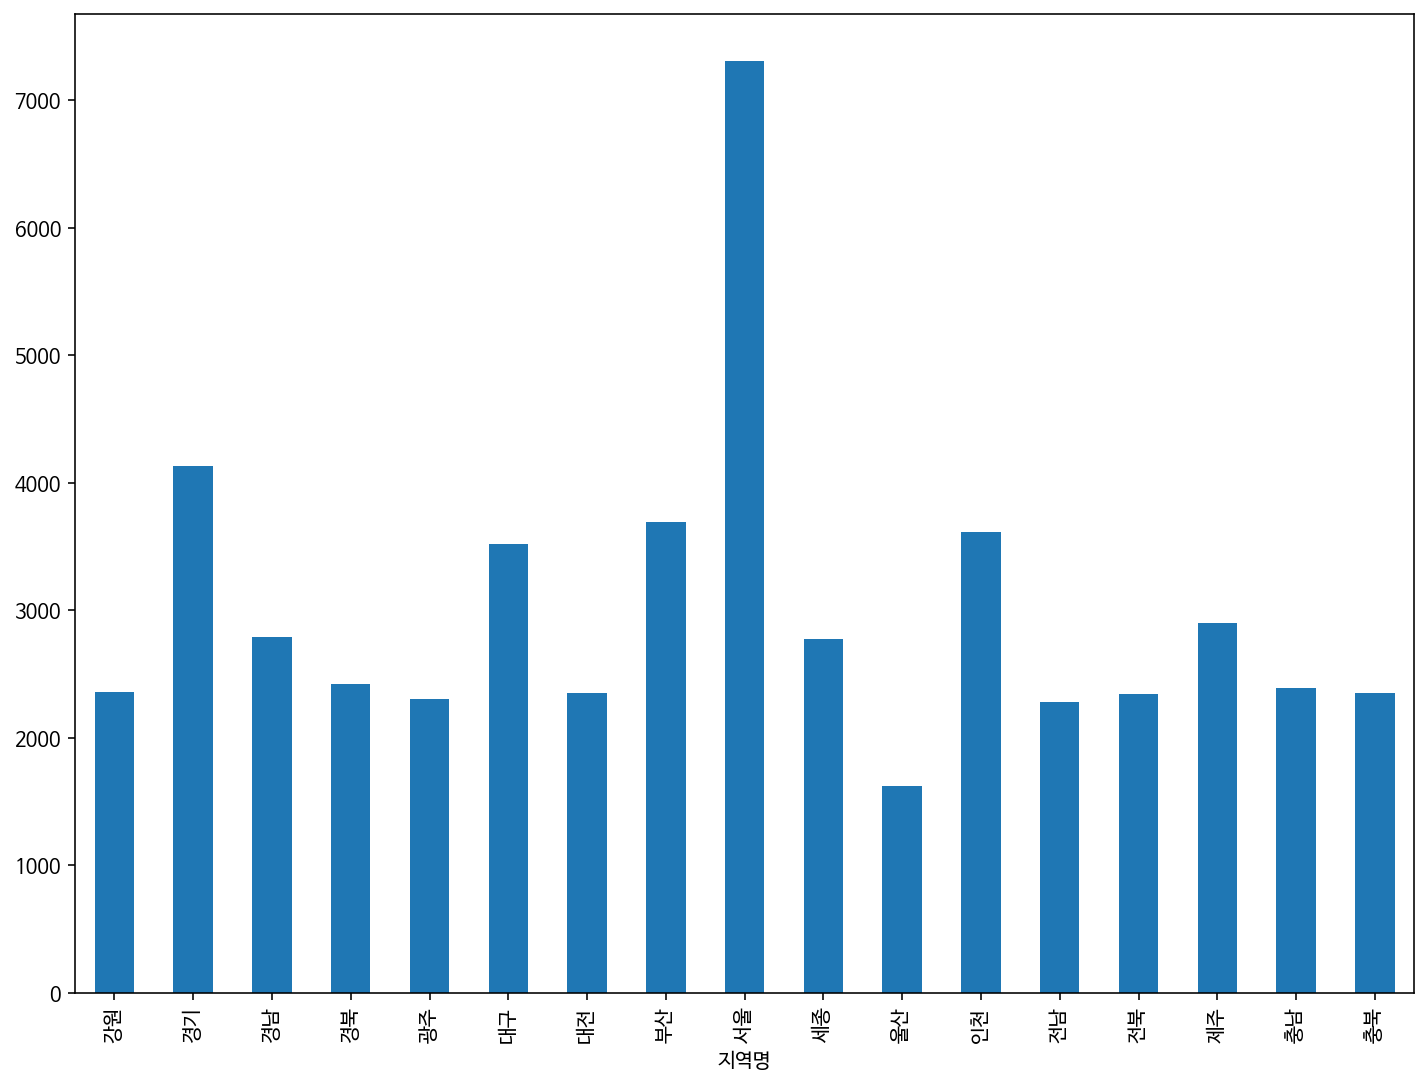

In [23]:
local_price_mean.plot(kind='bar')

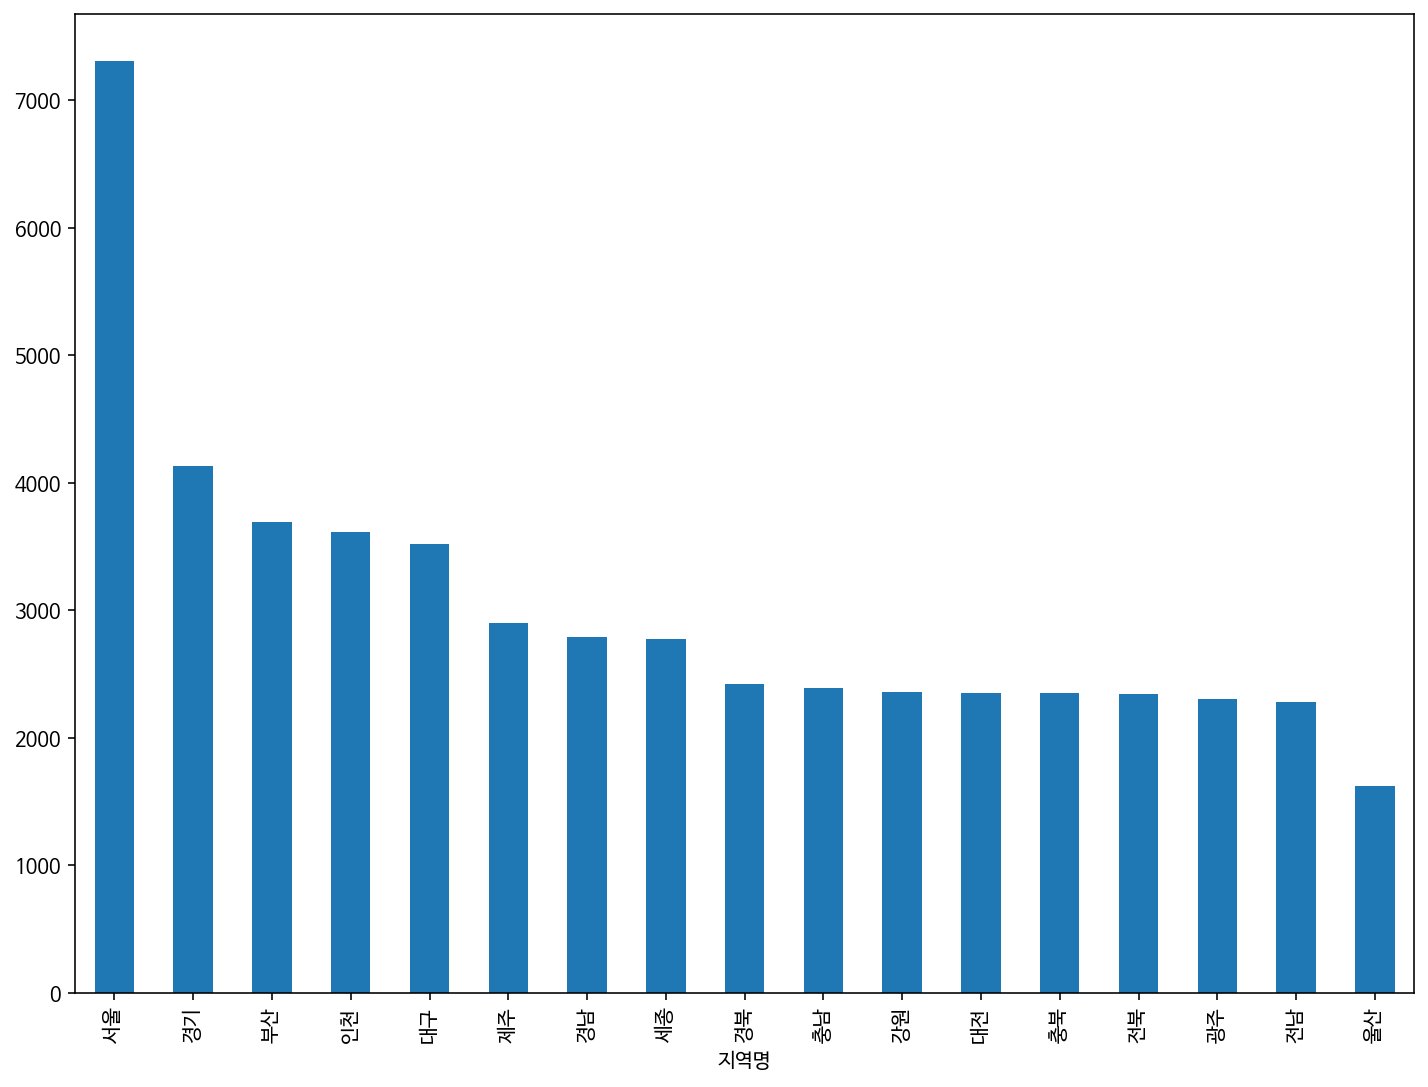

In [31]:
# 분양가격 내림차순으로 정렬해서 확인
local_price_mean_sorted = local_price_mean.sort_values(ascending=False)
local_price_mean_sorted.plot(kind='bar')

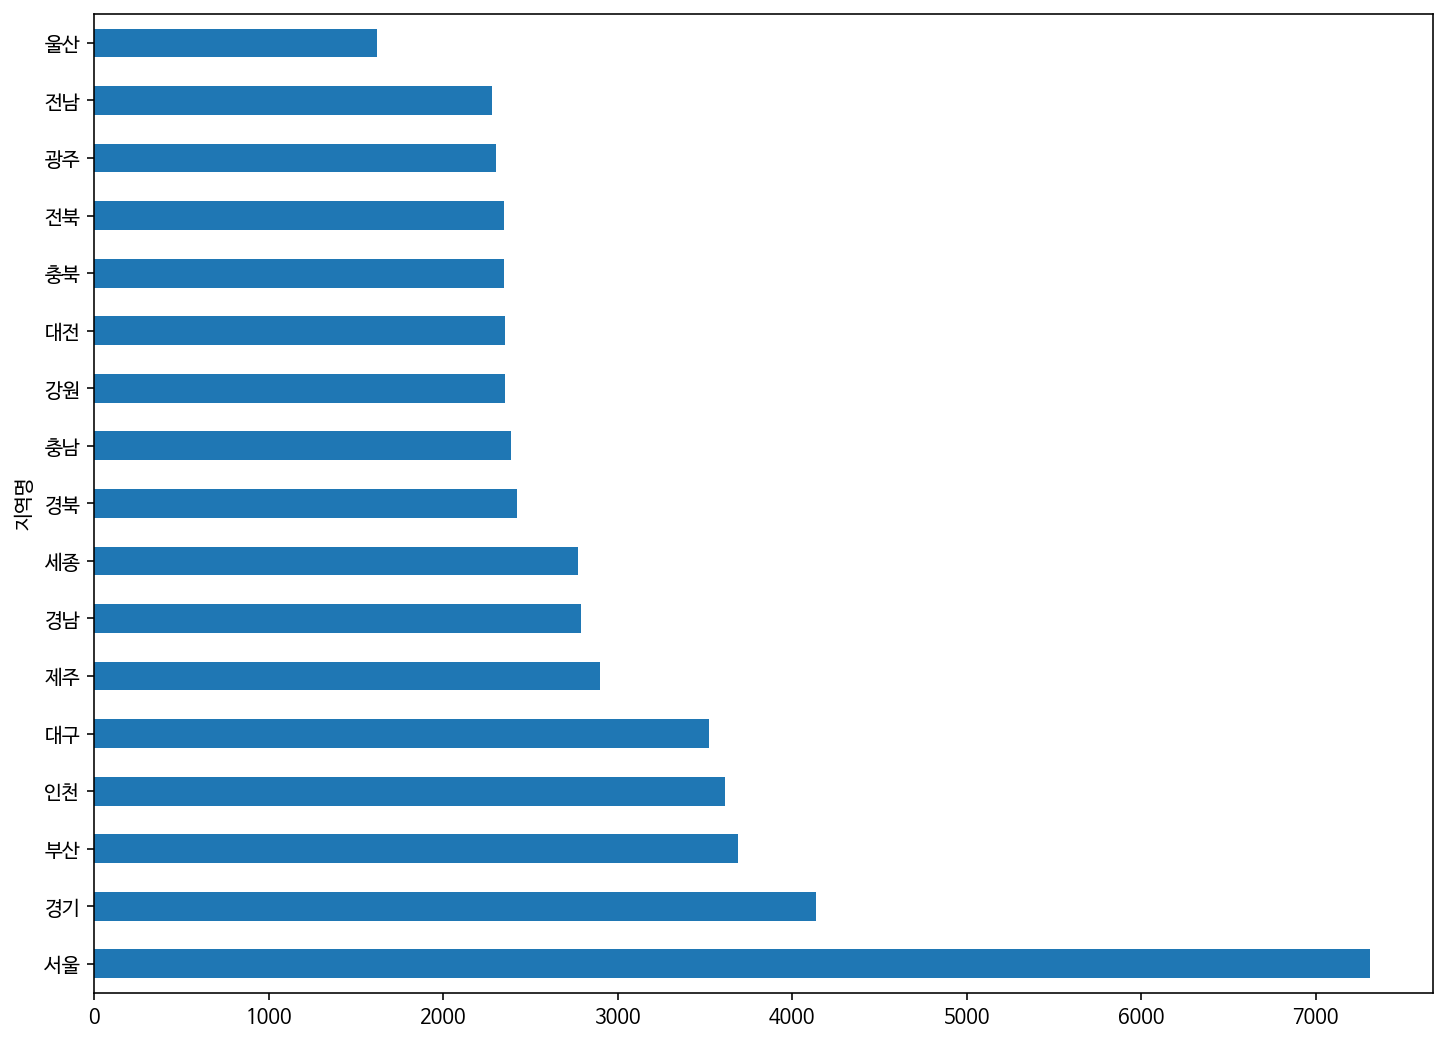

In [21]:
local_price_mean_sorted.plot(kind='barh')

In [19]:
drop_idx = df.loc[df['분양가격'] == 0].index
drop_idx

Int64Index([], dtype='int64')

In [20]:
df = df.drop(drop_idx, axis=0)
df.loc[df['분양가격'] == 0]

,지역명,규모구분,연도,월,분양가격


## 히스토그램 
히스토그램은 분포를 시각화 해서 보여줍니다.
- 가로 축에는 분포(데이터)
- 세로축에는 빈도 가로축(구간)에 데이터가 있다.

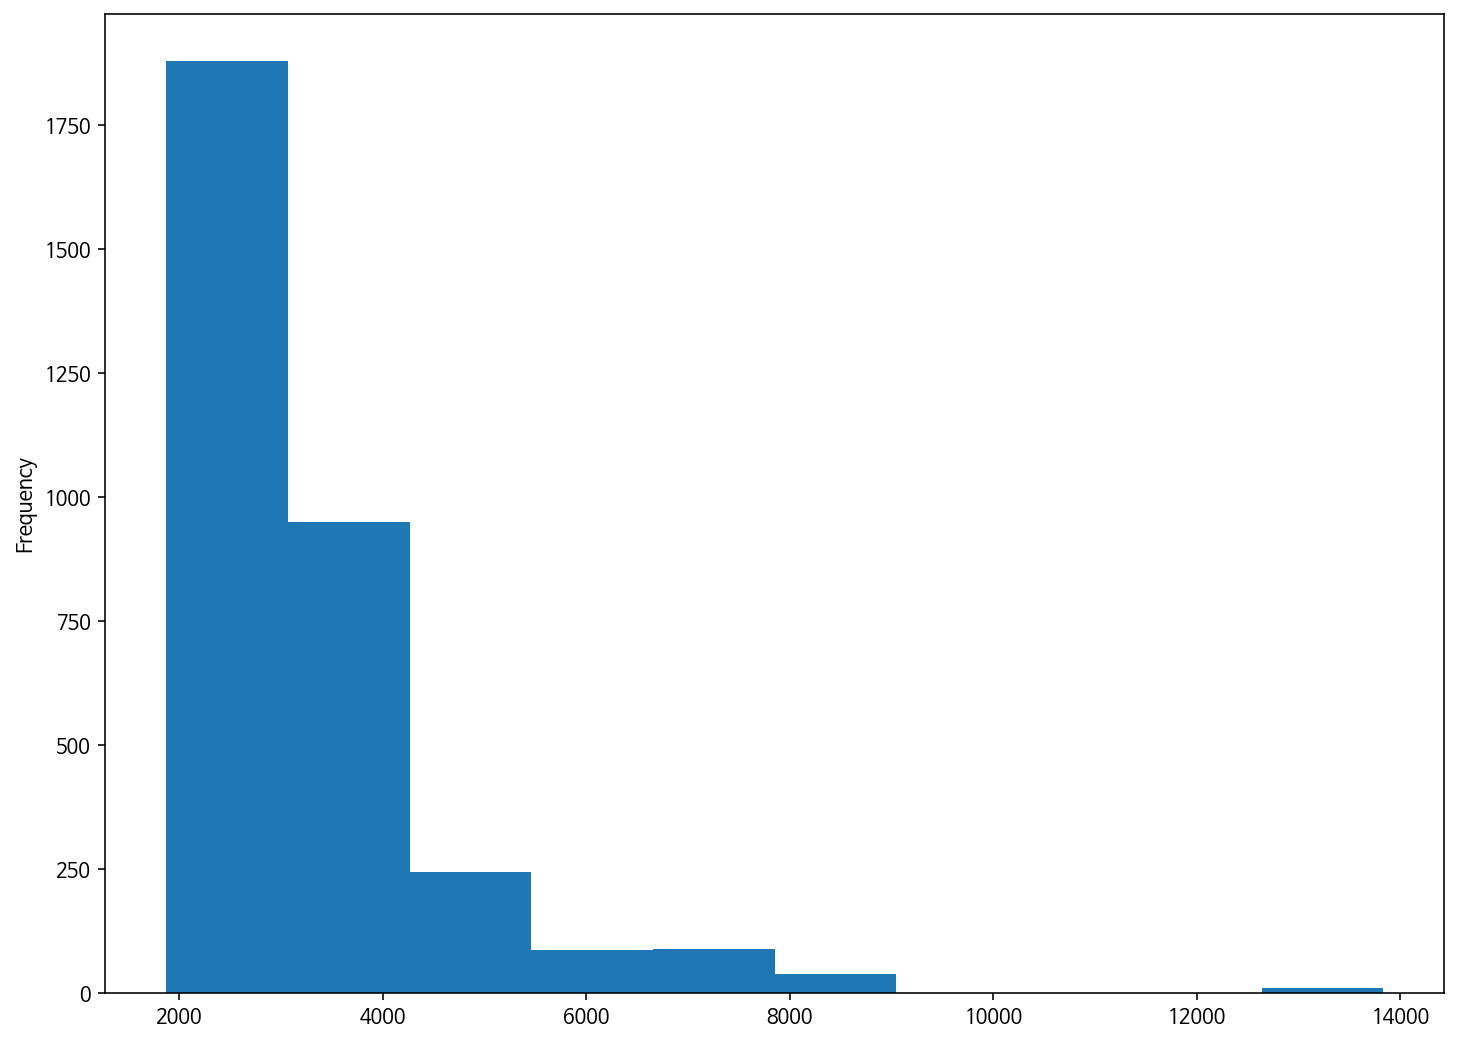

In [30]:
# 분양가격의 구간ㄴ별 빈도수
df['분양가격'].plot(kind='hist')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


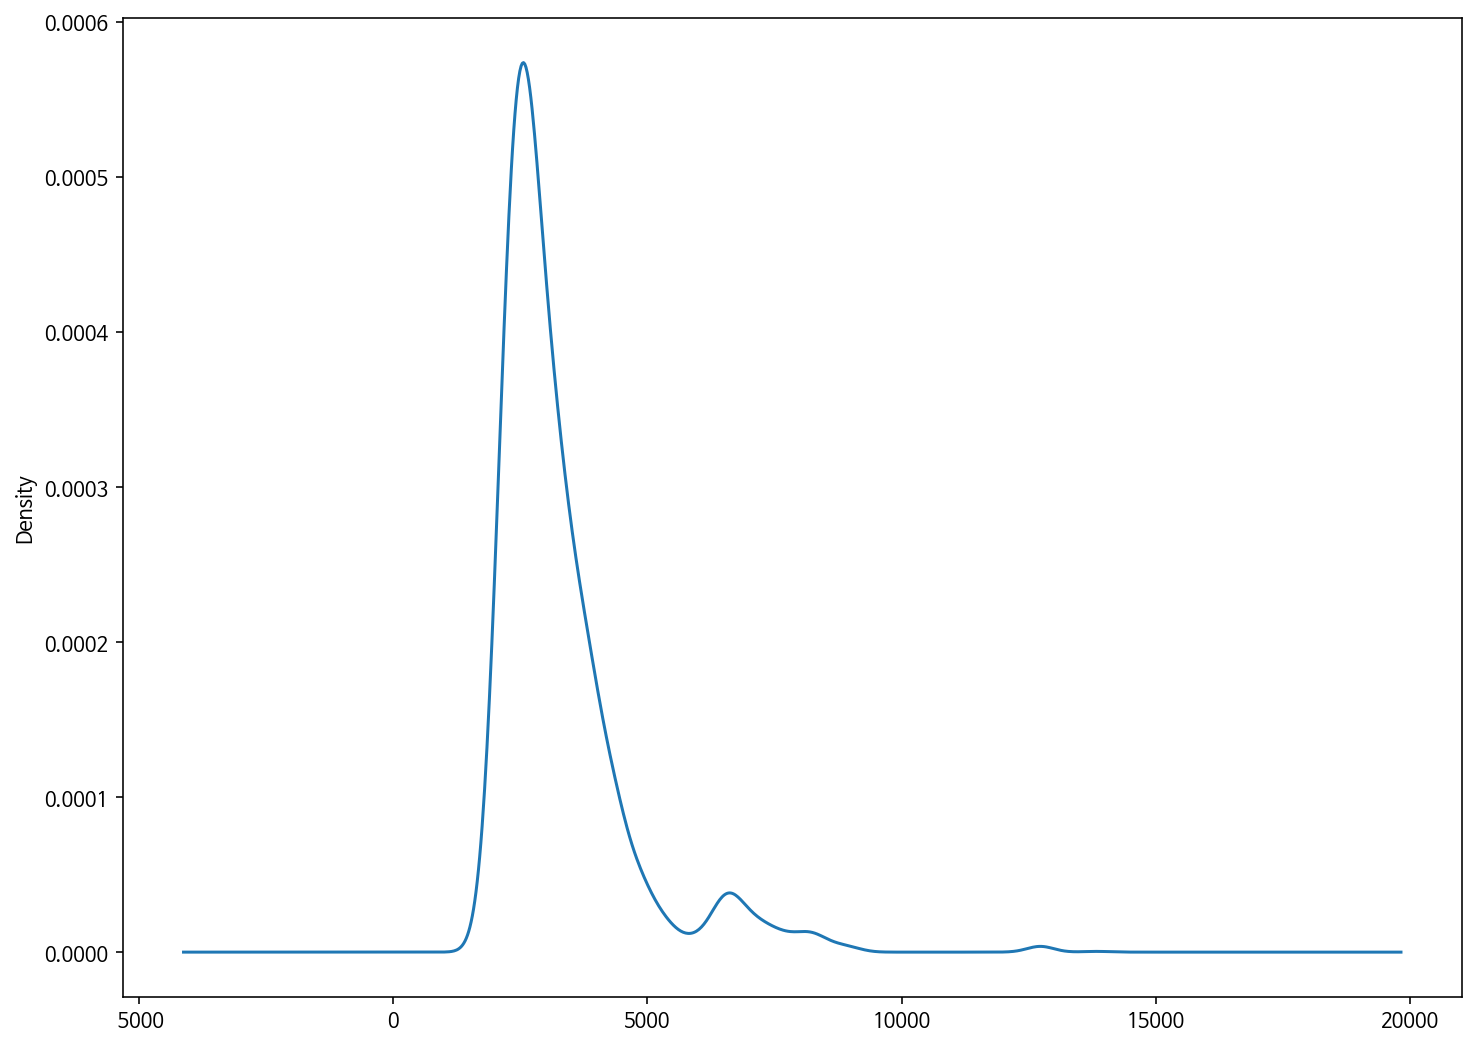

In [32]:
## 커널 밀도 그래프(히스토그램과 유사하지만 부드러운 라인을 가지고 있다.)
df['분양가격'].plot(kind='kde') #kernel Density Estimation

## Hexbin
;고밀도 산점도 그래프
x, y를 모두 넣어줘야 한다
   - 둘 다 numeric한 값이어야 한다
* 데이터의 밀도를 추정

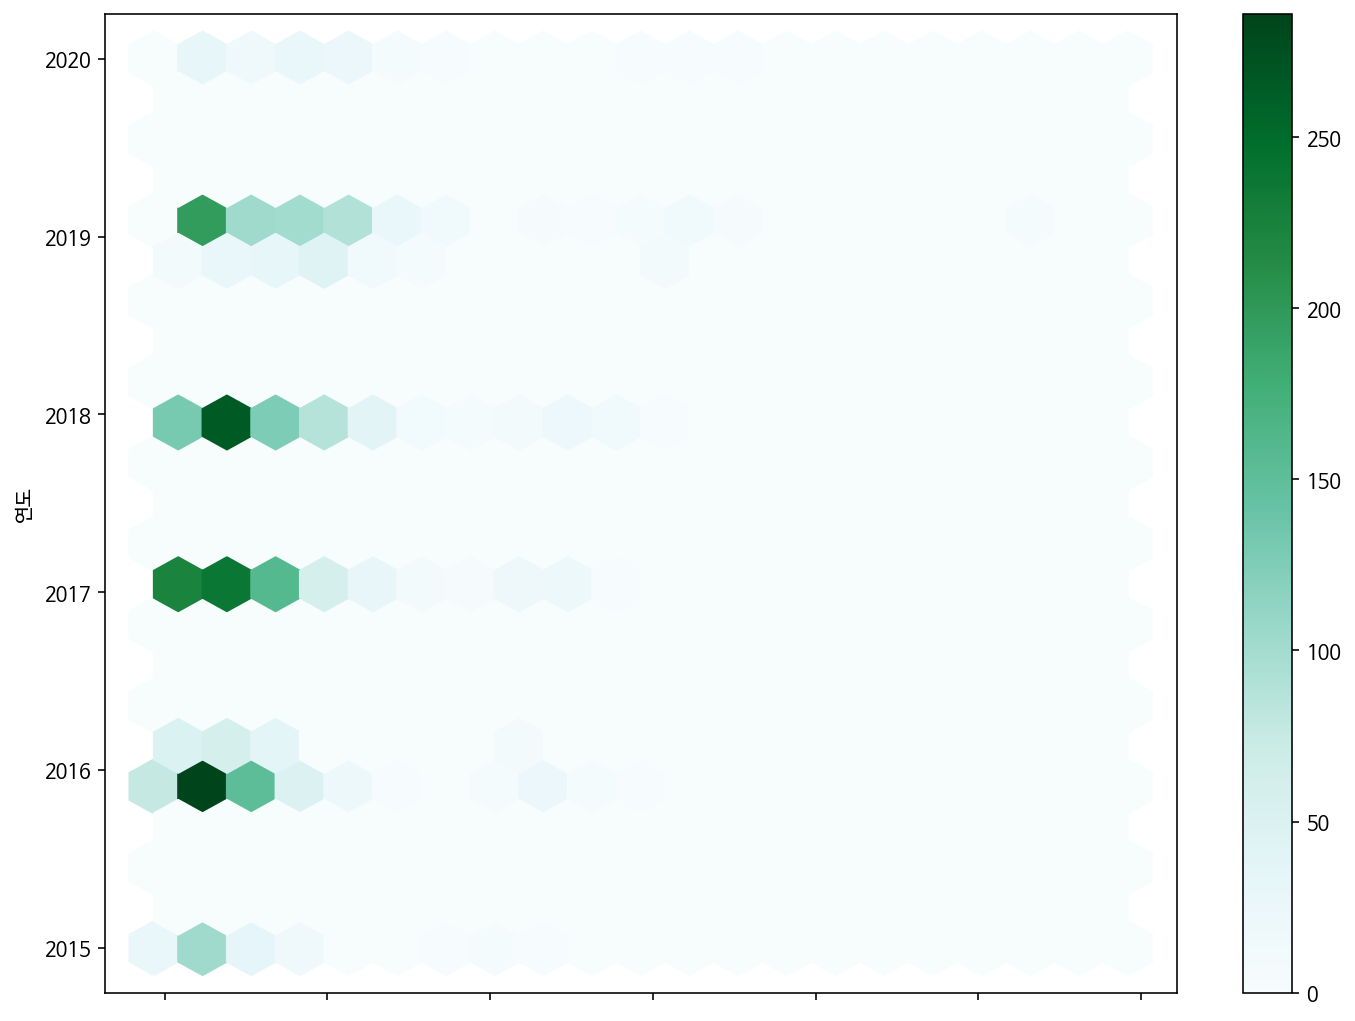

In [34]:
df.plot(kind='hexbin', x='분양가격', y='연도', gridsize=20)

# 박스 플롯(box)
* 데이터의 최대, 최소, 평균, 중간값 등 집계된 정보를 한눈에 볼 수 있게 해주는 시각화 기법
* 이상치(outlier)도 손쉽게 판단이 가능하다.


In [36]:
df_seoul = df.loc[df['지역명'] == '서울']
df_seoul

,지역명,규모구분,연도,월,분양가격
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
68,서울,60㎡이하,2015,11,6320
...,...,...,...,...,...
3471,서울,102㎡초과,2020,1,8779
3536,서울,60㎡이하,2020,2,8193
3537,서울,60㎡초과 85㎡이하,2020,2,8140
3538,서울,85㎡초과 102㎡이하,2020,2,13835


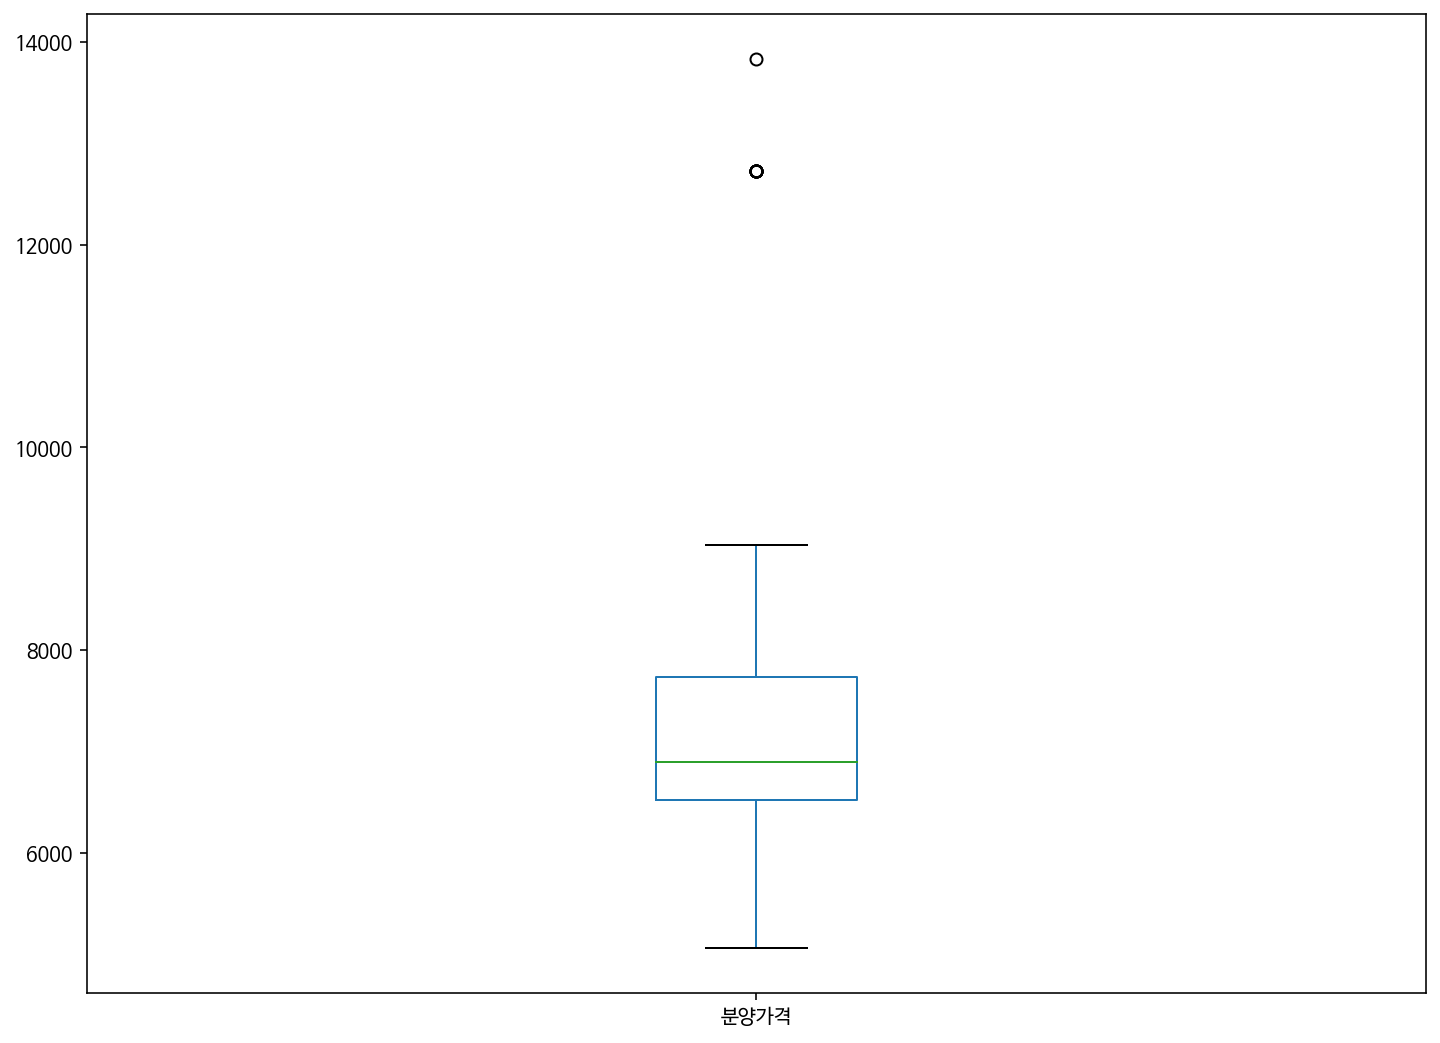

In [37]:
df_seoul['분양가격'].plot(kind='box')

In [38]:
df_seoul.describe()['분양가격']

count      212.000000
mean      7308.943396
std       1402.869496
min       5061.000000
25%       6519.750000
50%       6895.500000
75%       7732.000000
max      13835.000000
Name: 분양가격, dtype: float64

IQR = (3Q - 1Q)* 1.5

In [41]:
Q3 = 7732
Q1 = 6519.75
IQR = (Q3 - Q1) * 1.5
IQR

1818.375

In [42]:
## 최대 범위
Q3 +IQR

9550.375

In [43]:
## 최소 범위
Q1 - IQR

4701.375

박스 플롯은 데이터의 이상치(outlier)를 감지할 때 가장 많이 활용된다.

# area plot
line 그래프에서 아래 영역(area)를 색칠해 주는 것이 특징


In [45]:
#월별 분양가격의 개수
price_by_month_count = df.groupby('월')['분양가격'].count()
price_by_month_count

월
1     308
2     307
3     246
4     251
5     251
6     250
7     248
8     248
9     248
10    316
11    312
12    308
Name: 분양가격, dtype: int64

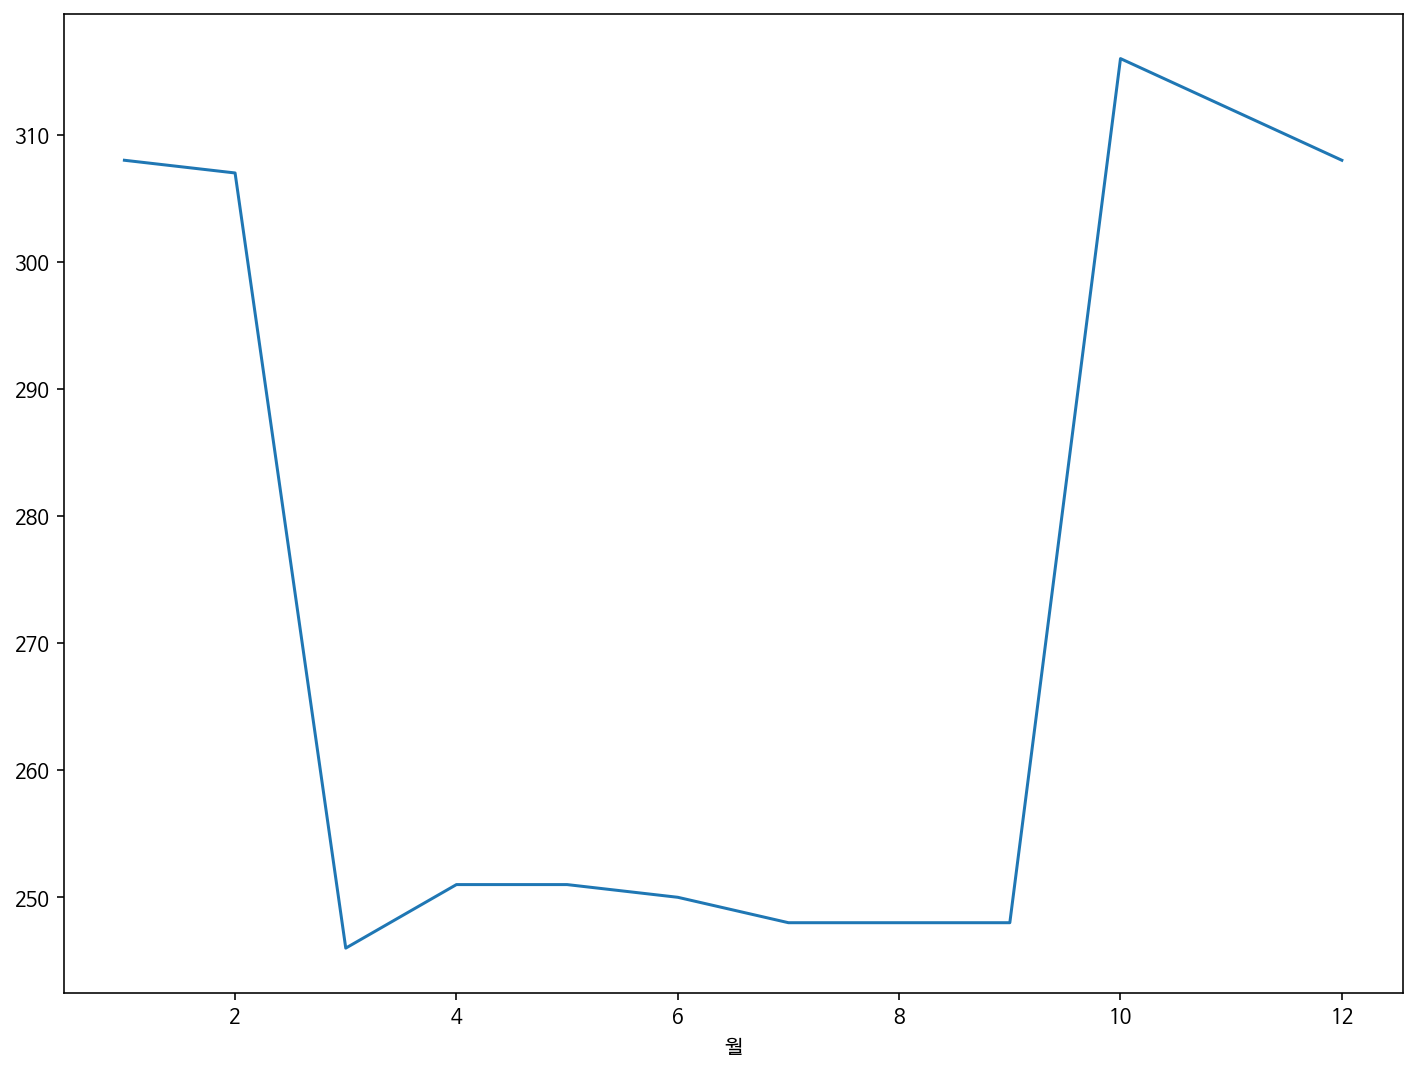

In [46]:
price_by_month_count.plot(kind='line')

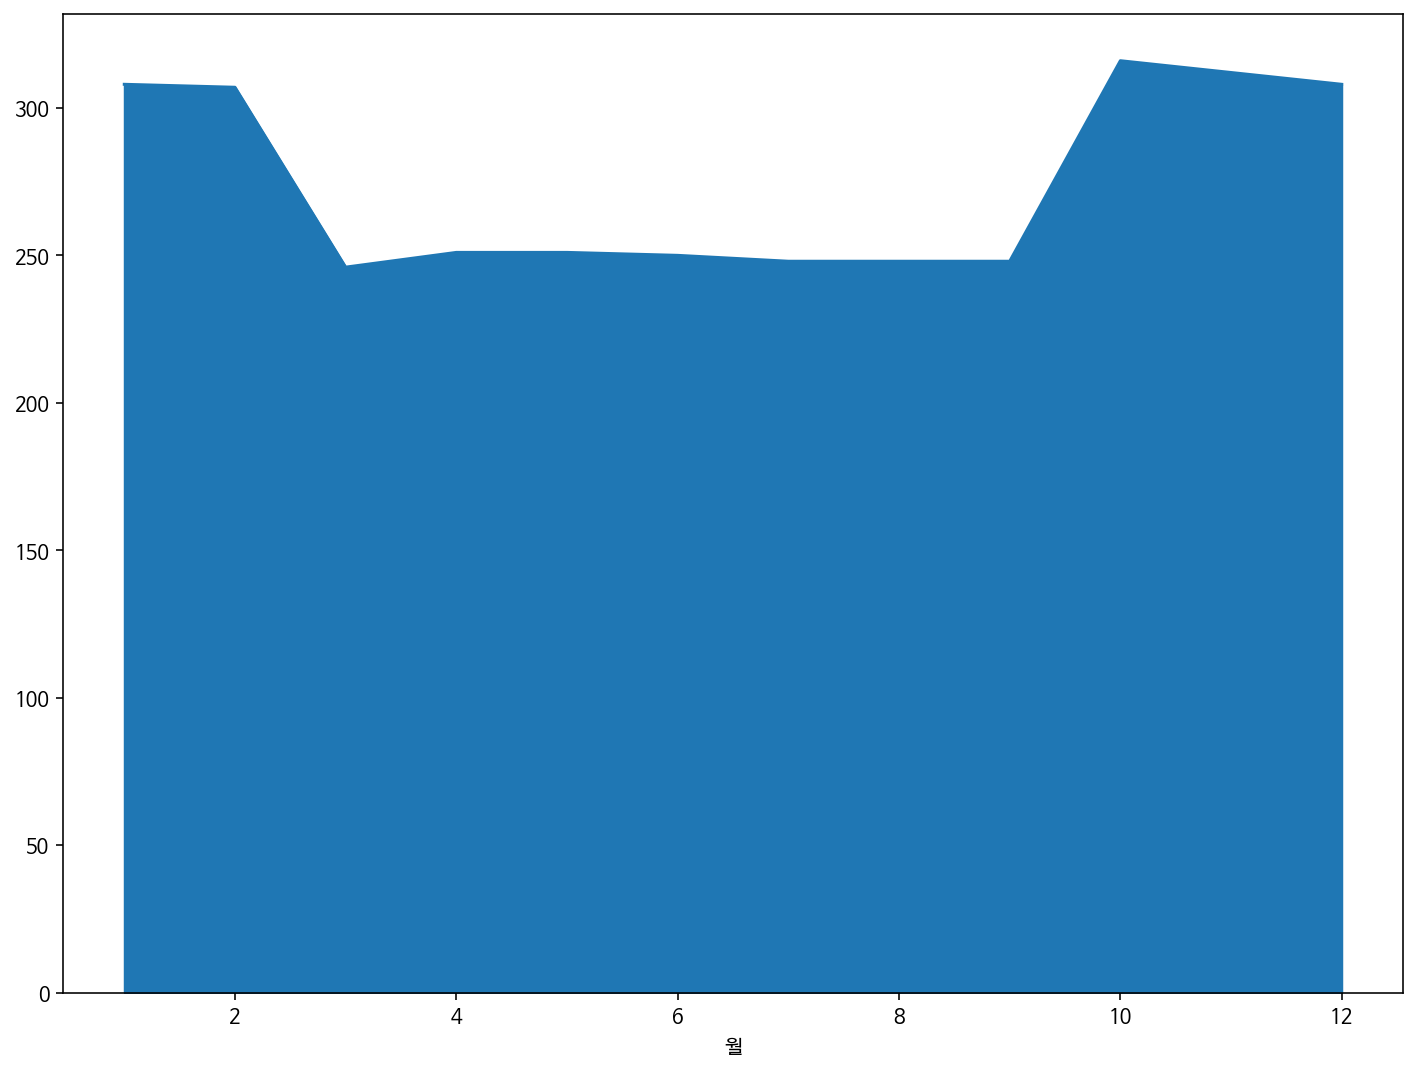

In [47]:
price_by_month_count.plot(kind='area')

## pie plot
pie의 대표적인 사용처: 데이터의 점유욜을 볼 때 가장 많이 사용

In [49]:
price_by_month = df.groupby('연도')['분양가격'].count()
price_by_month

연도
2015    192
2016    780
2017    771
2018    716
2019    716
2020    118
Name: 분양가격, dtype: int64

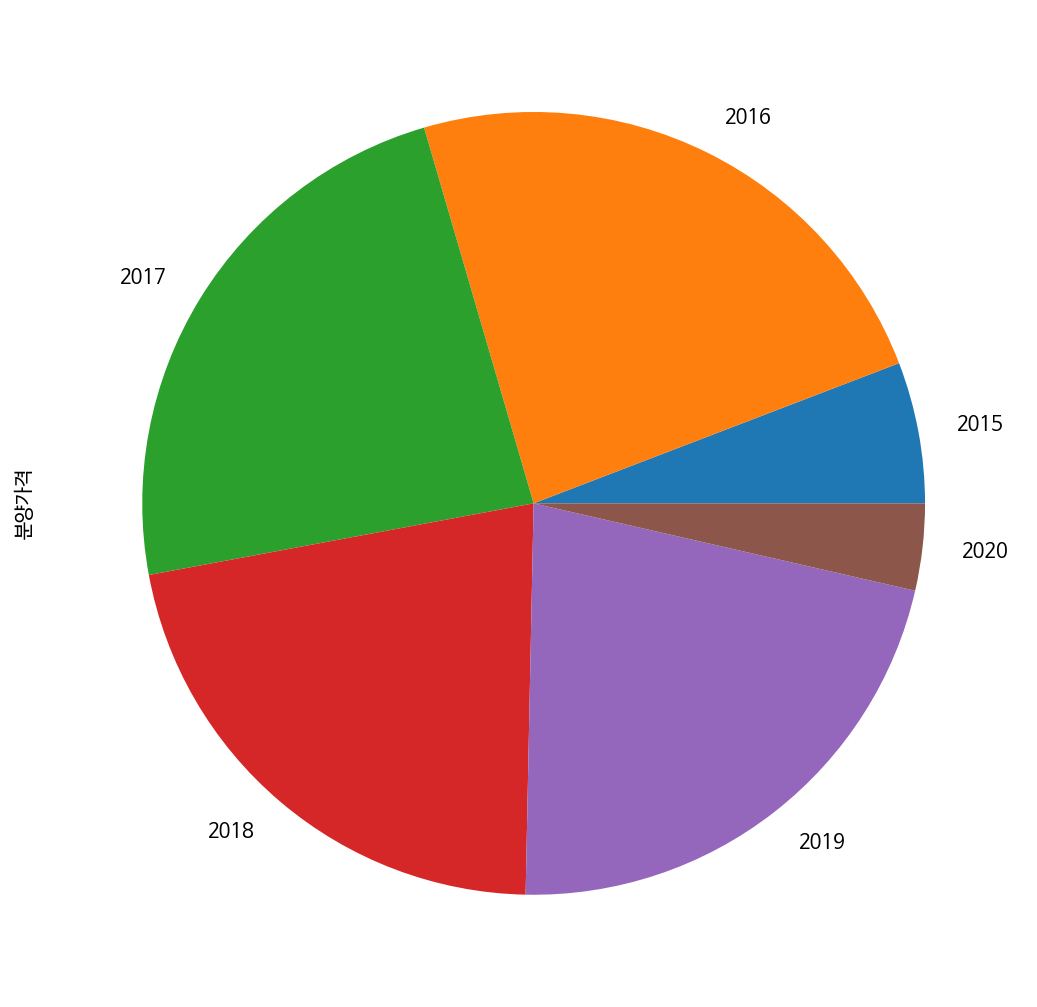

In [50]:
price_by_month.plot(kind='pie')
## 최근 추세는 파이 그래프를 잘 사용하지 않는다.

## scatter plot (산점도 그래프)
* 점으로 데이터 표기
* x, y값을 모두 넣어주어야 하며,x, y축모두 numeric 값을 넣어줘야 한다
* 데이터의 분포도를 확인하기 위해 사용

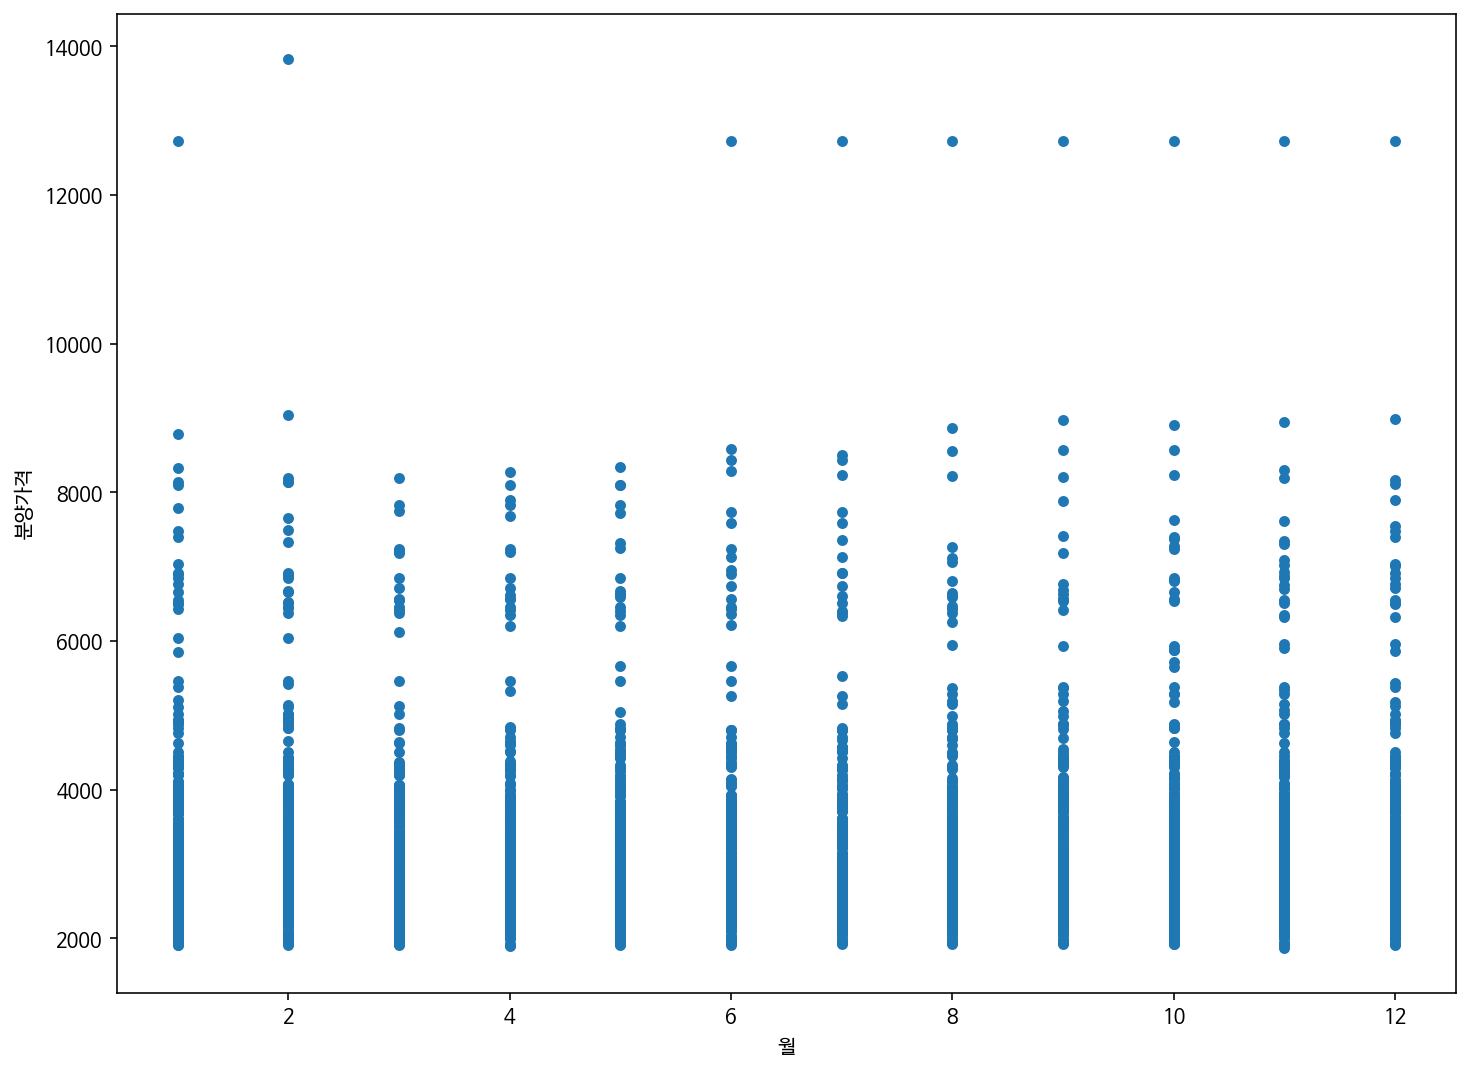

In [52]:
df.plot(x='월', y='분양가격', kind='scatter')